In [9]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#Creamos numero de nodos
n = 50
nodos = [i for i in range(n)]
nodos

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [46]:
arcos = [(i,j) for i in nodos for j in nodos if i!=j]

In [47]:
#Generamos de manera aleatoria los puntos
np.random.seed(0)
X = np.random.random(n)
Y = np.random.random(n)

In [48]:
#Calculamos la distancia
distance = {(i,j): np.hypot(X[i]-X[j], Y[i]-Y[j]) for i in nodos for j in nodos if i!=j}

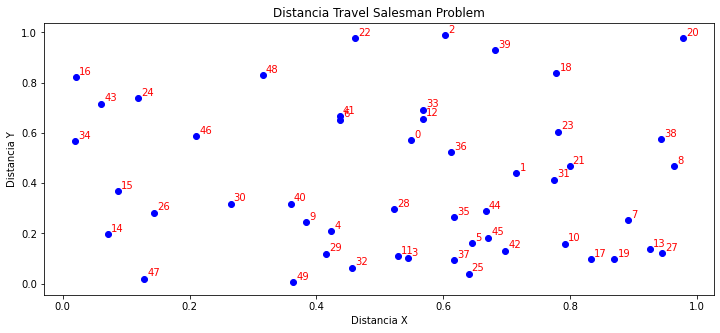

In [49]:
#Ploteamos los puntos
distance = {(i,j): np.hypot(X[i]-X[j], Y[i]-Y[j]) for i in nodos for j in nodos if i!=j}
plt.figure(figsize=(12, 5))
plt.scatter(X,Y, color='blue')

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n], Y[n]), xytext=(X[n]+0.005, Y[n]+0.01), color='red')

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Distancia Travel Salesman Problem")
plt.show()

In [50]:
#Anadimos funcion objetivo, que es la distancia total y los constarints
model = Model('TSP')

x = model.addVars(arcos, vtype = GRB.BINARY, name='x')
u = model.addVars(nodos, vtype = GRB.CONTINUOUS, name='u')

model.setObjective(quicksum(distance[n]*x[n] for n in arcos), GRB.MINIMIZE)

model.addConstrs(quicksum(x[i,j] for j in nodos if j!=i)==1 for i in nodos)
model.addConstrs(quicksum(x[i,j] for i in nodos if j!=i)==1 for j in nodos)

model.addConstrs((x[i, j]==1) >> (u[i]+1==u[j]) for i,j in arcos if j!=0)
# model.Params.timeLimit = 60
# model.Params.MIPGap = 0.1
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [36]:
#Valor de la funcion objetivo
print("Funcion Objetivo: ", str(round(model.ObjVal,2)))
for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

Funcion Objetivo:  3.17
x[0,11]=1.0
x[1,0]=1.0
x[2,12]=1.0
x[3,2]=1.0
x[4,3]=1.0
x[5,8]=1.0
x[6,4]=1.0
x[7,1]=1.0
x[8,10]=1.0
x[9,14]=1.0
x[10,13]=1.0
x[11,9]=1.0
x[12,5]=1.0
x[13,7]=1.0
x[14,6]=1.0
u[1]=14.0
u[2]=7.0
u[3]=6.0
u[4]=5.0
u[5]=9.0
u[6]=4.0
u[7]=13.0
u[8]=10.0
u[9]=2.0
u[10]=11.0
u[11]=1.0
u[12]=8.0
u[13]=12.0
u[14]=3.0


In [37]:
#Cuales son las conexiones optimas hechas
arcos_activos = [i for i in arcos if x[i].x > 0.9]
print(arcos_activos)

[(0, 11), (1, 0), (2, 12), (3, 2), (4, 3), (5, 8), (6, 4), (7, 1), (8, 10), (9, 14), (10, 13), (11, 9), (12, 5), (13, 7), (14, 6)]


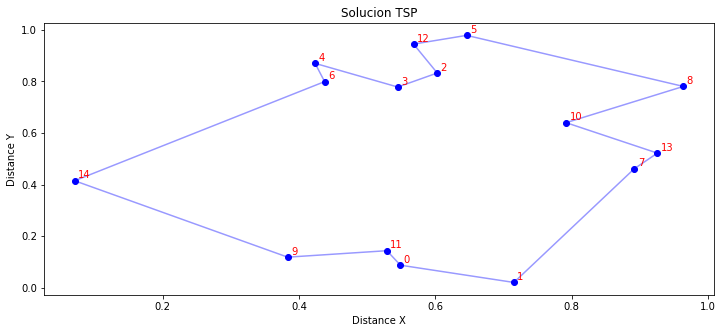

In [38]:
#Ploteamso la solucion
plt.figure(figsize=(12,5))

plt.xlabel("Distance X")
plt.ylabel("Distance Y")
plt.title("Solucion TSP")

plt.scatter(x=X, y=Y, color="blue", zorder=1)

for i,j in arcos_activos:
    plt.plot([X[i], X[j]],[Y[i], Y[j]], color='b', alpha=0.4, zorder=0)
for n in range(len(X)):
    plt.annotate(str(n), xy= (X[n], Y[n]), xytext=(X[n]+0.005,Y[n]+0.01), color='red')
    
plt.show()